In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


데이터를 불러와서 입력과 출력으로 분리

In [0]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

In [0]:
X_train, X_test, y_train, y_test = train_test_split(all_X,
                                        all_Y,
                                        stratify=cancer.target,
                                        test_size=0.3,
                                        random_state=77)

모델 생성, 훈련, 예측

In [0]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)

평가

In [5]:
model.score(X_train, y_train)

1.0

In [6]:
model.score(X_test, y_test)

0.9181286549707602

모델 생성, 훈련, 평가를 함수로 만들기

In [0]:
cancer = load_breast_cancer()
all_X = cancer.data
all_Y = cancer.target

def TreeModel(TestSize=0.3, treedepth=3):
  X_train, X_test, y_train, y_test = train_test_split(all_X,
                                                      all_Y,
                                                      stratify=cancer.target,
                                                      test_size=TestSize,
                                                      random_state=77)
  
  model = DecisionTreeClassifier(random_state=0, max_depth=treedepth)
  model.fit(X_train, y_train)
  print('훈련 데이터에 대한 점수 :', model.score(X_train, y_train))
  print('테스트 데이터에 대한 점수 :', model.score(X_test, y_test))

depth, test size에 따른 평가 점수

In [29]:
for i in range(1,8):
  for size in range(1,6):
    size_10 = size/10
    print('depth : {}, test_size : {}' .format(i, size_10))
    TreeModel(TestSize=size_10, treedepth=i)
    print('--------------------------------------------------')



#test_size_list = [0.1, 0.2, 0.3, 0.4, 0.5]
#n_list = range(3,11)
#
#for n in n_list:
#  print('트리의 깊이 : {}' .format(n))
#  for i in test_size_list:
#    t_rate = (1-i)*100   # 훈련 데이터 비율
#    test_rate = i*100    # 테스트 데이터 비율
#    print('훈련 데이터와 테스트 데이터의 비율 -> {} : {}' .format(t_rate, test_rate))
#    TreeModel(TestSize=i)
#    print('--------------------------------------------------')
#  print('=======================================================================')

depth : 1, test_size : 0.1
훈련 데이터에 대한 점수 : 0.92578125
테스트 데이터에 대한 점수 : 0.8596491228070176
--------------------------------------------------
depth : 1, test_size : 0.2
훈련 데이터에 대한 점수 : 0.9296703296703297
테스트 데이터에 대한 점수 : 0.8947368421052632
--------------------------------------------------
depth : 1, test_size : 0.3
훈련 데이터에 대한 점수 : 0.9321608040201005
테스트 데이터에 대한 점수 : 0.8830409356725146
--------------------------------------------------
depth : 1, test_size : 0.4
훈련 데이터에 대한 점수 : 0.9354838709677419
테스트 데이터에 대한 점수 : 0.8859649122807017
--------------------------------------------------
depth : 1, test_size : 0.5
훈련 데이터에 대한 점수 : 0.9436619718309859
테스트 데이터에 대한 점수 : 0.887719298245614
--------------------------------------------------
depth : 2, test_size : 0.1
훈련 데이터에 대한 점수 : 0.953125
테스트 데이터에 대한 점수 : 0.8771929824561403
--------------------------------------------------
depth : 2, test_size : 0.2
훈련 데이터에 대한 점수 : 0.9560439560439561
테스트 데이터에 대한 점수 : 0.8859649122807017
---------------------------

트리(tree)의 특성 중요도(feature importance)
* 특성 중요도 : 이 값은 0과 1사이의 숫자.
* 0은 전혀 사용되지 않음.
* 1은 완벽하게 타깃 클래스를 예측했다.
* 특성 중요도의 전체 합은 1이다.
* 특성의 feature_importance_ 값이 낮다고 해서 특성이 유용하지 않다는 것이 아니다. 단지 트리가 그 특성을
선택하지 않았다는 것.

In [30]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
# 특성의 중요도
model.feature_importances_

array([0.        , 0.00765861, 0.00806757, 0.        , 0.00896396,
       0.        , 0.        , 0.02636444, 0.        , 0.        ,
       0.01280592, 0.        , 0.        , 0.        , 0.01849807,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.15797911, 0.00239039,
       0.        , 0.01882432, 0.73844761, 0.        , 0.        ])

특성별 중요도 그래프 그리기

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def plot_feature_imp_cancer(model):
  n_features = cancer.data.shape[1]    # feature(변수의 개수)
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), cancer.feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [0]:
def plot_feature_imp_cancer_up(model, feature_num, feature_names):
  n_features = feature_num    # feature(변수의 개수)
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

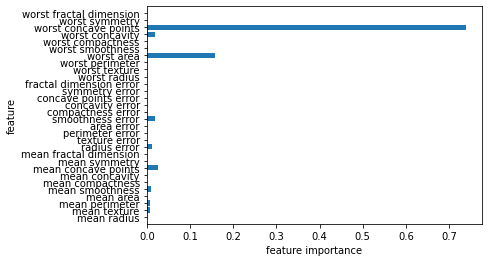

In [36]:
feature_n = cancer.data.shape[1]
feature_names = cancer.feature_names
plot_feature_imp_cancer_up(model, feature_n, feature_names)